#Load dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
import math
from scipy import stats, integrate
import warnings
warnings.filterwarnings("ignore")

In [2]:
bank = pd.read_csv('bank-additional-full.csv', sep= ';')

In [3]:
bank.head(3)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [5]:
bank.isnull().sum().sum()

0

In [6]:
bank.shape

(41188, 21)

In [7]:
df = bank.copy()

In [8]:
df['duplicated'] = df.duplicated()
df[df['duplicated'] == True]

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,duplicated
1266,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,...,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,True
12261,36,retired,married,unknown,no,no,no,telephone,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no,True
14234,27,technician,single,professional.course,no,no,no,cellular,jul,mon,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,True
16956,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no,True
18465,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no,True
20216,55,services,married,high.school,unknown,no,no,cellular,aug,mon,...,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no,True
20534,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,...,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no,True
25217,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,...,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no,True
28477,24,services,single,high.school,no,yes,no,cellular,apr,tue,...,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no,True
32516,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,...,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,True


In [9]:
bank = bank.drop_duplicates()
bank.shape

(41176, 21)

1. Số lượng KH tham gia chiến dịch là 41176
2. Số lượng KH đồng ý mở tài khoản là 4639


In [10]:
def week_month(bank):
    d_week = {'mon':2, 'tue':3, 'wed':4, 'thu':5, 'fri':6}
    d_mons = {'jan':1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 'jul':7, 'aug':8, 'sep':9, 'oct':10, 'nov':11, 'dec':12}
    bank.month = bank.month.map(d_mons)
    bank.day_of_week = bank.day_of_week.map(d_week)
    return bank

In [11]:
week_month(bank)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,5,2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,5,2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,5,2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,5,2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,5,2,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,retired,married,professional.course,no,yes,no,cellular,11,6,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,11,6,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,11,6,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,11,6,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes


#Caculate conversion rate

In [12]:
bank['y'].value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [13]:
bank['conversion'] = bank['y'].replace({'yes': 1, 'no': 0})
print('Total conversion: {0} out of {1}'.format(bank.conversion.sum(),bank.shape[0]))
print('Conversion rate: {:.2%}'.format((bank.conversion.sum()/bank.shape[0])))

Total conversion: 4639 out of 41176
Conversion rate: 11.27%


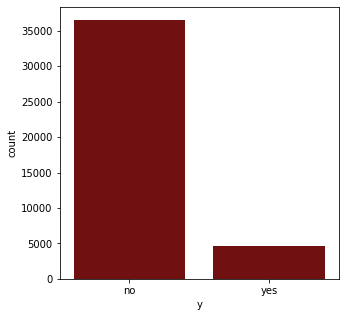

In [14]:
plt.figure(figsize = (5,5))
ax = sns.countplot(data=bank, x= 'y', color='Maroon')
plt.show()

Số khách hàng đồng ý đăng kí tiền gửi có kì hạn ít hơn so với không đồng ý.

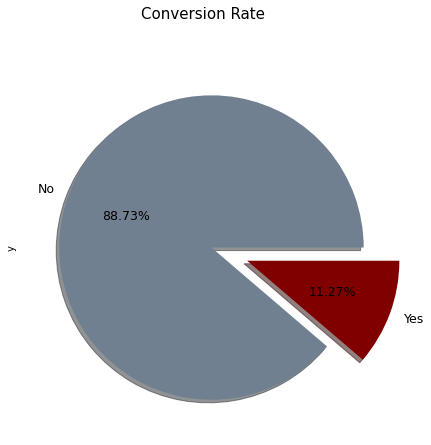

In [15]:
plt.figure(figsize = (10,7))

colors = ['SlateGrey','Maroon']
labels = 'No', 'Yes'
plt.suptitle('Conversion Rate', fontsize=15)
bank["y"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', shadow=True, colors=colors, 
                                             labels=labels, fontsize=12.5)
plt.show()

Tỷ lệ chuyển đổi khá thấp cho thấy chiến dịch chưa đạt hiệu quả cao.

#Hàm get visualization

In [16]:
color = ['SlateGrey','Maroon']
def get_visualization(feature,target):
    a = pd.pivot_table(bank, values=target, index=feature, columns='conversion', aggfunc=len)
    ax = (a.div(a.sum(0), axis=1)).plot(kind='bar',figsize=(15,7), width =0.5, edgecolor=None,color=color)
    plt.legend(labels=a.columns,fontsize=12)
    plt.xticks(fontsize=12)
    for spine in plt.gca().spines.values():
        spine.set_visible(False)
        plt.yticks([])
#     plt.hlines(0.1126,-0.5,len(list(rotation_province.keys())))
    # Add this loop to add the annotations
    for p in ax.patches:
        width, height = p.get_width(), p.get_height()
        x, y = p.get_xy()
        ax.annotate('{:.1%}'.format(height), (x, y + height + 0.01))

#Tổng quan

##Poutcome

In [17]:
bank['poutcome'].value_counts()

nonexistent    35551
failure         4252
success         1373
Name: poutcome, dtype: int64

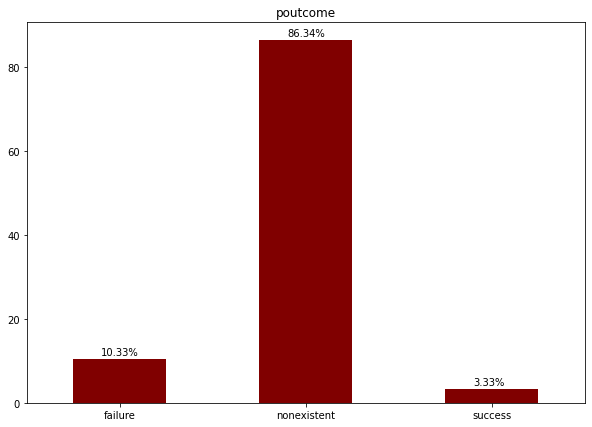

In [18]:
plt.figure(figsize=(10,7))
ax = (bank['poutcome'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('poutcome')
plt.show()

Phần lớn khách hàng được tiếp thị trong chiến dịch này đều là khách hàng chưa từng tham gia vào chiến dịch tiếp thị nào trước đó. Số lượng khách hàng mới này là 35551, chiếm  86.34% trên tổng số khách hàng tham gia. Có 10.33% khách hàng tham gia là khách hàng có kết quả thất bại và 3.33% khách hàng chấp nhận đăng kí mở tài khoản tiền gửi từ chiến dịch tiếp thị trước đó.


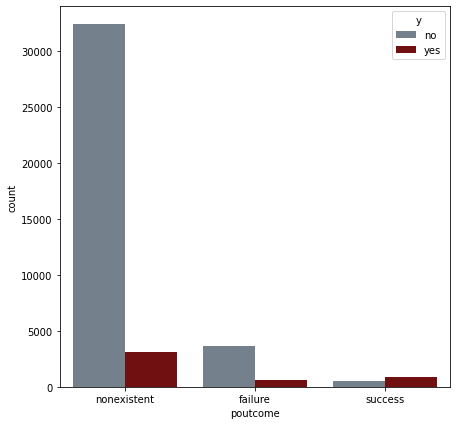

In [19]:
color = ['SlateGrey','Maroon']
plt.figure(figsize=(7, 7))
sns.countplot(data=bank, x='poutcome', hue='y', palette=color)
plt.show()	

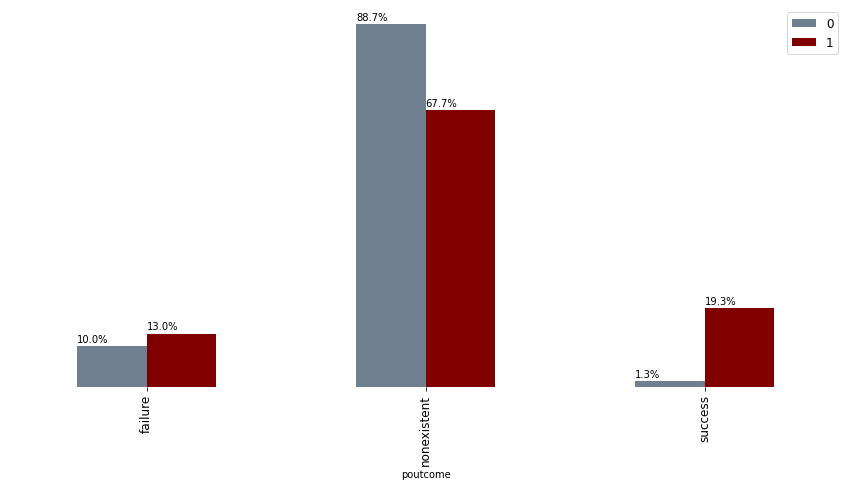

In [20]:
get_visualization('poutcome','y')

Tỉ lệ phần trăm khách hàng có kết quả “success” từ chiến dịch trước rất ít nhưng tỉ lệ khách hàng đó đồng ý đăng kí tài khoản có kỳ hạn lại cao hơn số khách hàng từ chối 18%. Số khách hàng mới được tiếp cận tuy nhiều nhưng tỉ lệ từ chối cũng rất cao, chiếm 88.7% trên tổng số khách hàng từ chối. 

##Age

In [21]:
print('Min age:', bank['age'].max())
print('Max age:', bank['age'].min())

Min age: 98
Max age: 17


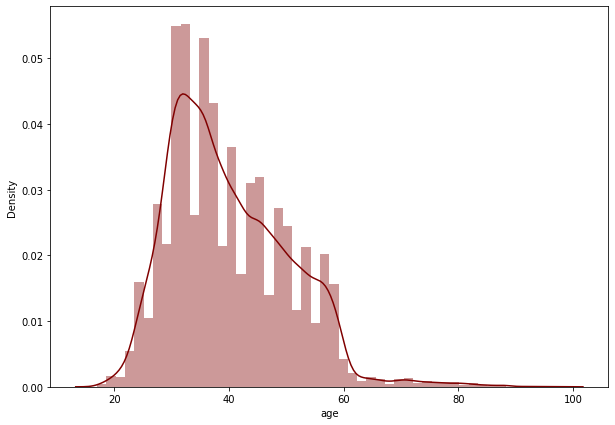

In [22]:
plt.figure(figsize = (10,7))
sns.distplot(bank['age'],  kde=True, color= 'maroon')
plt.show()

Đa số khách hàng tham gia là người trưởng thành và đông nhất là ở độ tuổi khoảng 30+. Trong chiến dịch tiếp thị này, khách hàng có độ tuổi cao nhất là 98 và nhỏ nhất là 17 tuổi.


##Mean

In [23]:
bank.mean()

age                 40.023800
month                6.607733
day_of_week          3.979600
duration           258.315815
campaign             2.567879
pdays              962.464810
previous             0.173013
emp.var.rate         0.081922
cons.price.idx      93.575720
cons.conf.idx      -40.502863
euribor3m            3.621293
nr.employed       5167.034870
conversion           0.112663
dtype: float64

In [24]:
bank.groupby('y').mean()

,age,month,day_of_week,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,conversion
y,,,,,,,,,,,,,
no,39.910994,6.580672,3.974574,220.868079,2.633385,984.109396,0.132414,0.248885,93.603798,-40.593232,3.811482,5176.165690,0.0
yes,40.912266,6.820867,4.019185,553.256090,2.051951,791.990946,0.492779,-1.233089,93.354577,-39.791119,2.123362,5095.120069,1.0


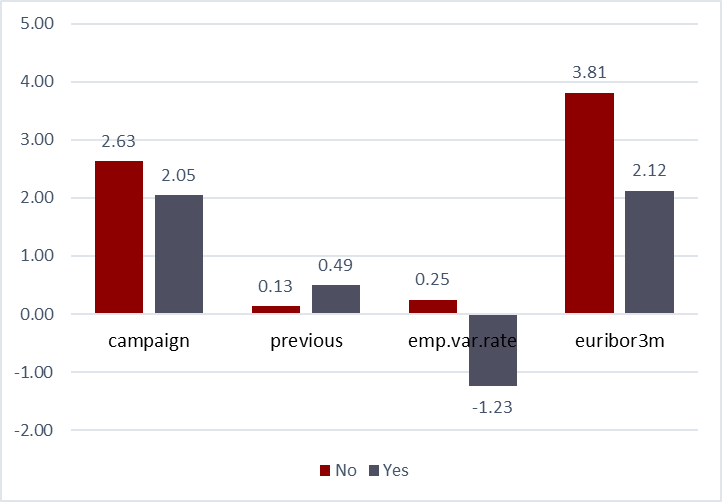

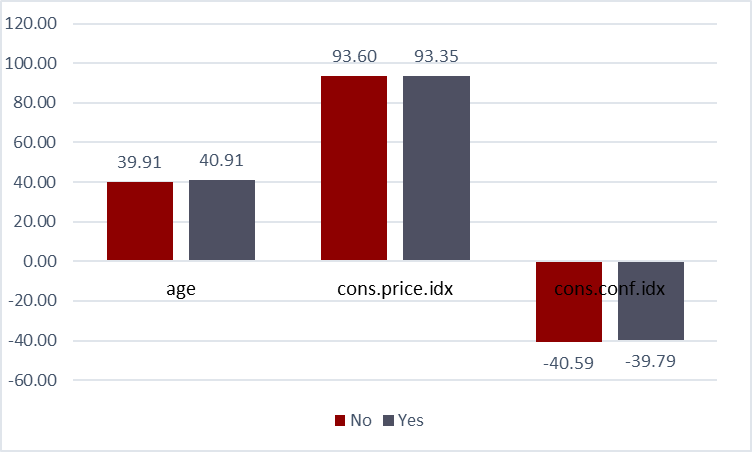

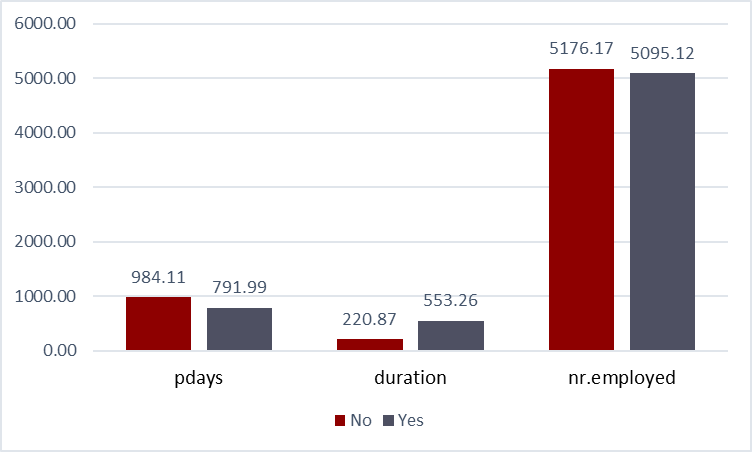

- Độ tuổi trung bình của khách hàng đăng ký tiền gửi có kỳ hạn cao hơn so với khách không đăng ký là 1 tuổi.
- Trung bình một khách hàng nhận được 2.6 cuộc gọi tiếp thị trong suốt chiến dịch. Tuy nhiên, thật ngạc nhiên khi khách hàng đã đăng ký tiền gửi có kỳ hạn nhận được số cuộc gọi thấp hơn.
- Trung bình tỷ lệ thay đổi việc làm ở nhóm đồng ý mở tài khoản là -1.23 trong khi nhóm không đăng ký có giá trị là 0.25
- Trung bình lãi suất gửi tín dụng ở khách hàng từ chối đăng ký là 3.81 và 2.12 ở nhóm đồng ý đăng ký.
- pdays: Số ngày kể từ khi khách hàng được liên hệ lần cuối của những khách hàng đã đăng ký tiền gửi thấp hơn so với khách hàng không đăng ký. Phải chăng, số ngày càng thấp, khả năng nhớ của khách hàng càng tốt  và do đó cơ hội tiếp thị thành công cao hơn.
- Thời gian trung bình của các cuộc gọi tiếp thị là 258.3s. Dễ dàng nhận thấy thời gian trung bình của các cuộc gọi có khách hàng đồng ý đăng ký lớn hơn so với các cuộc gọi tiếp thị thất bại.
=> Thời lượng cuộc gọi càng cao, khách hàng càng có nhiều khả năng mở một khoản tiền gửi có kỳ hạn. Vì thời lượng cuộc gọi là đặc điểm tương quan tích cực nhất đến việc liệu khách hàng tiềm năng có mở một khoản tiền gửi có kỳ hạn hay không, bằng cách đưa ra những câu hỏi thú vị cho khách hàng trong suốt cuộc gọi nên thời lượng cuộc trò chuyện có thể tăng lên. Điều này không đảm bảo rằng khách hàng sẽ đăng ký tuy nhiên, chúng ta không nên bỏ sót đặc điểm này.

Action: Vì vậy, bằng cách thực hiện chiến lược tăng mức độ tương tác với khách hàng tiềm năng => tăng xác suất đồng ý đăng kí => ngân hàng sẽ tăng hiệu quả cho chiến dịch tiếp thị tiếp theo.
- Trung bình một quý ở ngân hàng có 5095 nhân viên tiếp thị thực hiện tiếp thị thành công đến khách hàng. 


#Insights

##Conversion rate by Age

In [25]:
bank['age_group'] = pd.cut(bank['age'], [17, 26, 35, 45, 62, np.inf], labels = ['17-25','26-34','35-44', '45-61', '62+'])
age_conv = bank.groupby('age_group').agg({'conversion': ['sum','count']}).droplevel(0, axis = 1)
age_conv['conv_rate'] = age_conv['sum']/age_conv['count']*100
age_conv

,sum,count,conv_rate
age_group,,,
17-25,469,2358,19.889737
26-34,1618,14146,11.437862
35-44,1092,12839,8.505335
45-61,1101,11054,9.960195
62+,357,774,46.124031


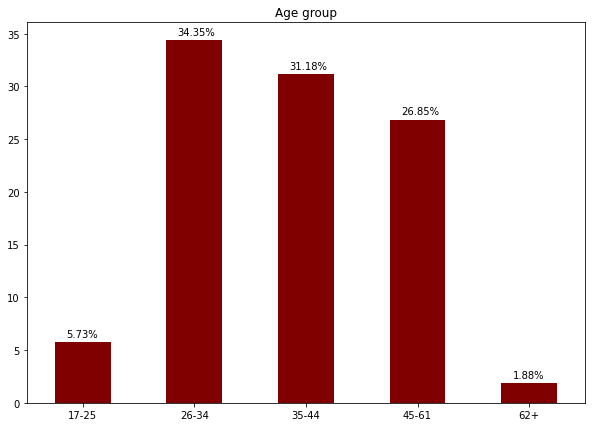

In [26]:
plt.figure(figsize=(10,7))
ax = (bank['age_group'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Age group')
plt.show()

Nhóm lao động trẻ 17-25 và nhóm lao động có kinh nghiệm 35-44 là 2 nhóm khách hàng tham gia chiến dịch nhiều nhất với hơn 65%, nhóm người làm việc quá tuổi hoặc đã nghỉ hưu 62+ là nhóm có số lượng tham gia ít nhất với 1.88%.


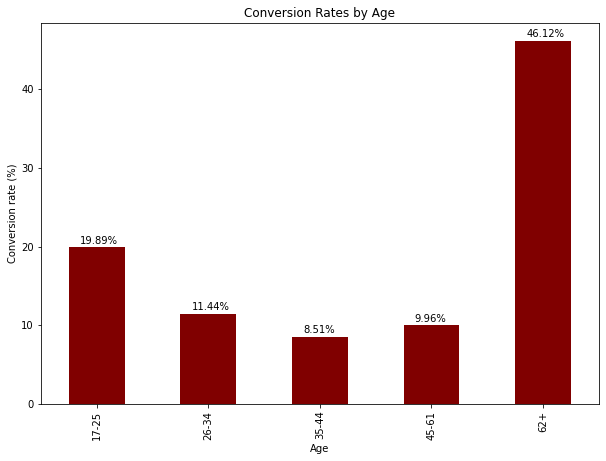

In [27]:
ax = age_conv['conv_rate'].plot(kind='bar',color='maroon',figsize=(10, 7),title='Conversion Rates by Age')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Age')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.show()

Phần lớn không đồng ý mở tài khoản khi ngân hàng liên hệ với họ về vấn đề này bởi 3 nhóm có đông người tham gia chiến dịch nhất có tỉ lệ chuyển đổi rất thấp. Mặc dù, nhóm tuổi 62+ tham gia chiến dịch rất ít nhưng tỉ lệ chuyển đổi rất cao, đạt 46.12%. Có lẽ, do vấn đề tuổi cao nên họ muốn tìm một nơi an toàn giữ tiền để an dưỡng tuổi già. Nhóm khách hàng trong độ tuổi 17-25 đạt tỉ lệ chuyển đổi ⅕, đây có thể là do họ là còn đi học hoặc mới tiến vào thị trường lao động nên chưa có nhiều tiền để đầu tư vào các danh mục sinh lời cao hơn, vì vậy họ đồng ý mở tài khoản.

Action: Nên tập trung tiếp thị vào 2 nhóm tuổi 17-25 và 62+ bởi họ là nhóm có nhu cầu cao hơn các nhóm khác. Để thu hút thêm khách hàng, ngân hàng cần có chiến dịch marketing thú vị, chất lượng dịch vụ cũng như các chương trình tri ân, chế độ hậu mãi tốt hơn.


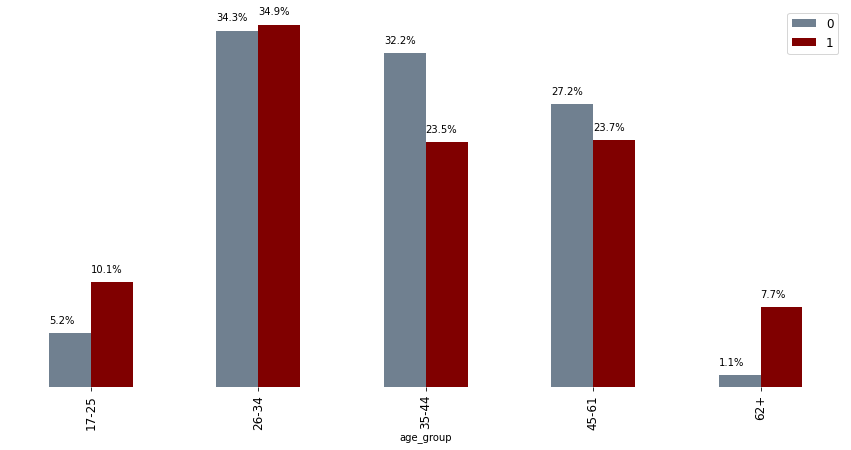

In [28]:
get_visualization('age_group','y')

##Conversion rate by Marital

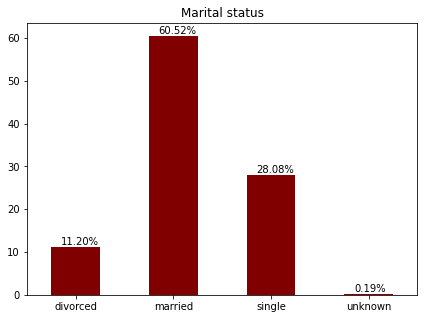

In [29]:
plt.figure(figsize=(7,5))
ax = (bank['marital'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Marital status')
plt.show()

Nhóm đã kết hôn, chiếm 60.52% tổng số khách hàng tham gia, tuy nhiên đây lại là nhóm có tỉ lệ chuyển đổi thấp nhất với 10.16%. Nhóm unknown tuy chỉ chiếm 0.19% lượng khách hàng nhưng tỉ lệ chuyển đổi cao nhất - 15%, đây có thể là do số lượng khách hàng nhóm này quá ít.


In [30]:
marital_conv = bank.groupby(by='marital')['conversion'].sum() / bank.groupby(by='marital')['conversion'].count() * 100.0
marital_conv

marital
divorced    10.323140
married     10.156093
single      14.008993
unknown     15.000000
Name: conversion, dtype: float64

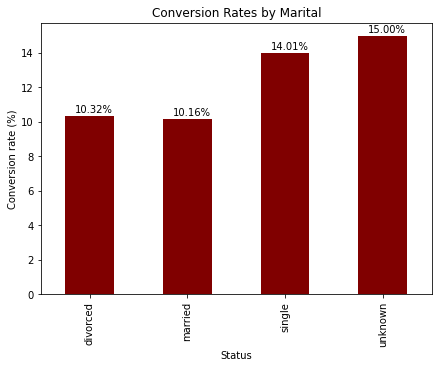

In [31]:
ax = marital_conv.plot(kind='bar',color='maroon',figsize=(7, 5),title='Conversion Rates by Marital')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Status')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

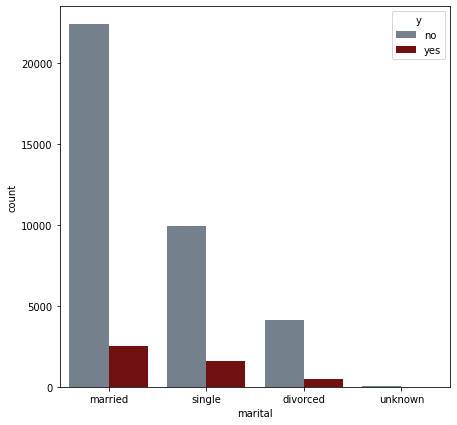

In [32]:
color = ['slategrey','maroon']
plt.figure(figsize=(7, 7))
sns.countplot(data=bank, x='marital', hue='y', palette=color)
plt.show()	

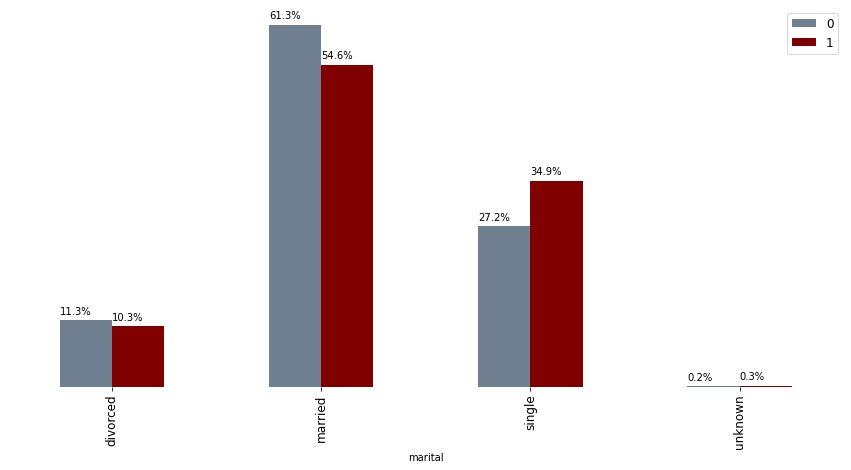

In [33]:
get_visualization('marital','y')

 Ở đây, chúng ta có thể thấy nhóm đã kết hôn có nhiều người đăng ký nhất, chiếm 54,6% tổng số người đăng ký, nhiều hơn tổng số người từ nhóm độc thân và ly hôn (lần lượt là 34,9% và 10,3%). Tuy nhiên, nếu xét riêng từng nhóm thì nhóm độc thân có khả năng đăng kí cao hơn là từ chối, còn nhóm đã kết hôn có tỉ lệ từ chối cao hơn. Có lẽ là do họ phần lớn là nhóm đã tham gia vào thị trường lao động lâu năm nên có nhiều kiến thức cũng như tài sản đem đi đầu tư vào những danh mục sinh lời nhiều hơn hoặc do họ đã có con cái nên họ để tiền nuôi con, trang trải cuộc sống.
 
Action: Đưa ra nhiều ưu đãi phù hợp với nhu cầu của nhóm khách hàng đã kết hôn để tăng lượng khách mở tài khoản.

##Do job titles affect conversion rate?

In [34]:
bank['job'].value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

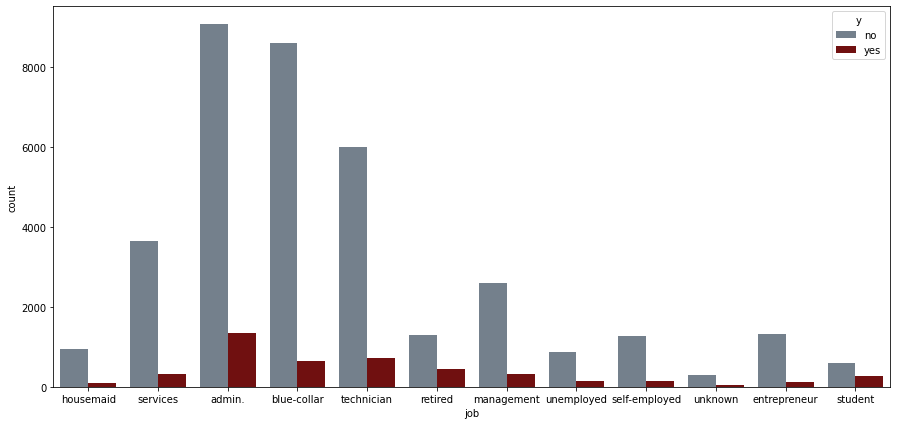

In [35]:
color = ['slategrey','maroon']
plt.figure(figsize=(15, 7))
sns.countplot(data=bank, x='job', hue='y', palette=color)
plt.show()	

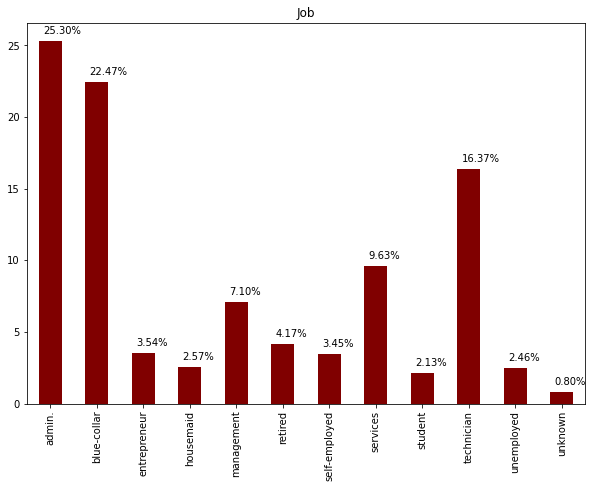

In [36]:
plt.figure(figsize=(10,7))
ax = (bank['job'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=90, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Job')
plt.show()

KH tập trung chủ yếu ở nhóm ngành nghề ‘admin’ (25.30%), ‘blue-collar’ (22.47%) và ‘technician’ (16.36%). Chỉ khách hàng đến từ 3 nhóm nghề này đã chiếm 64.13% lượng người tham gia. Và 2 nhóm có ít người tham gia nhất là ‘student’ và ‘unknown’ với giá trị lần lượt là 2.13% và 0.8%.


In [37]:
job_conv = bank.groupby(by='job')['conversion'].sum() / bank.groupby(by='job')['conversion'].count() * 100.0
job_conv

job
admin.           12.966695
blue-collar       6.895061
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.261932
self-employed    10.485574
services          8.142173
student          31.428571
technician       10.832468
unemployed       14.201183
unknown          11.212121
Name: conversion, dtype: float64

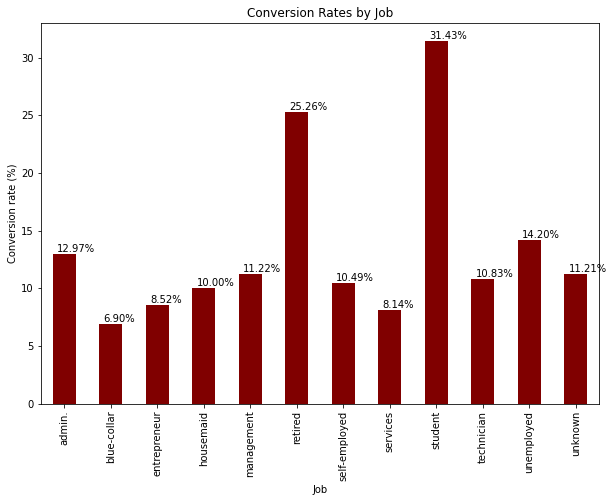

In [38]:
ax = job_conv.plot(kind='bar',color='maroon',figsize=(10, 7),title='Conversion Rates by Job')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Job')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

Tỉ lệ chuyển đổi ở nhóm khách hàng Học sinh và Người đã nghỉ hưu là cao nhất với giá trị lần lượt là 31.43% và 25.26% trong khi họ không phải nhóm khách hàng tham gia chiến dịch lớn nhất. Các nhóm ngành nghề khách có tỉ lệ chuyển đổi tương đối đồng đều. Nhóm khách hàng công nhân và người làm dịch vụ có tỉ lệ chuyển đổi thấp nhất. 

Action: Đẩy mạnh tiếp thị ở nhóm khách hàng đã nghỉ hưu và nhóm là học sinh, sinh viên. Chúng ta cũng có thể tiếp cận nhóm khách hàng này tại các câu lạc bộ người cao tuổi hoặc các trường học.

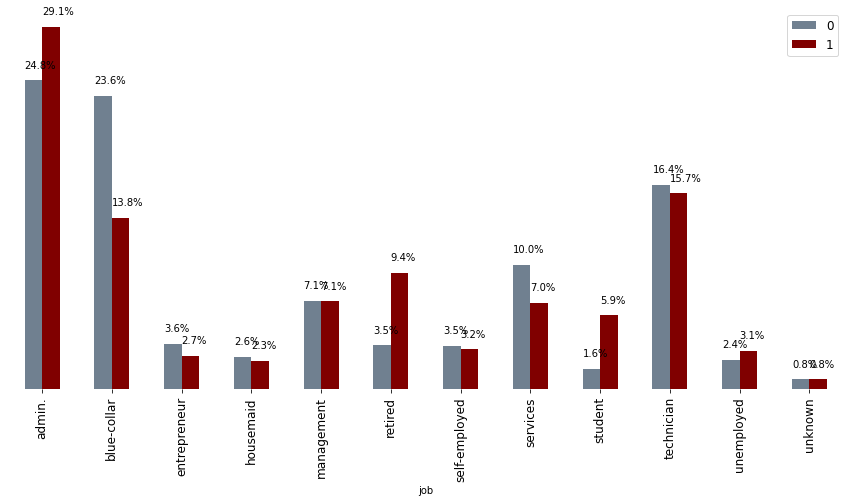

In [39]:
get_visualization('job','y')

## Does education affect conversion rate?

In [40]:
bank['education'].value_counts()

university.degree      12164
high.school             9512
basic.9y                6045
professional.course     5240
basic.4y                4176
basic.6y                2291
unknown                 1730
illiterate                18
Name: education, dtype: int64

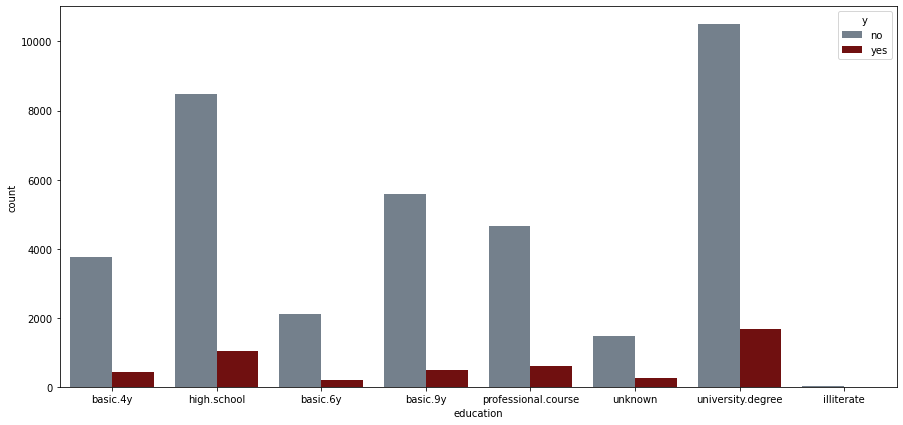

In [41]:
plt.figure(figsize=(15, 7))
sns.countplot(data=bank, x='education', hue='y', palette=color)
plt.show()	

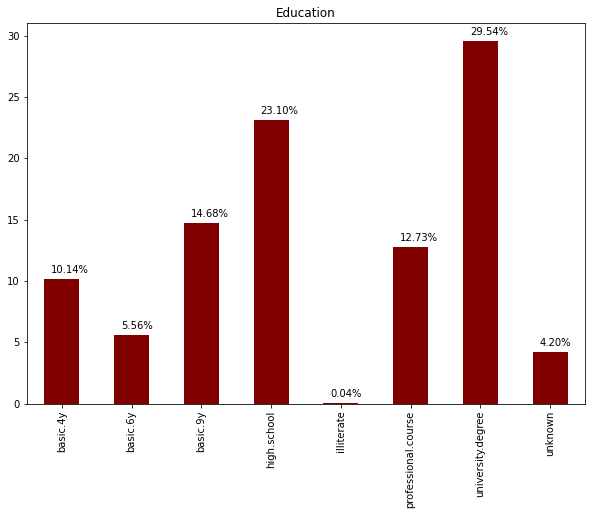

In [42]:
plt.figure(figsize=(10,7))
ax = (bank['education'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=90, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Education')
plt.show()

Nhóm có trình độ học vấn ‘university.degree’ và ‘high.school’ là tệp khách hàng được tiếp thị nhiều nhất trong chiến dịch lần này với hơn 50%. Nhóm ‘illiterate’ là nhóm có ít khách hàng nhất, số lượng người ‘mù chữ’ tham gia vào chiến dịch lần này là 18.


In [43]:
edu_conv = bank.groupby(by='education')['conversion'].sum() / bank.groupby(by='education')['conversion'].count() * 100.0
edu_conv

education
basic.4y               10.249042
basic.6y                8.206024
basic.9y                7.824648
high.school            10.838940
illiterate             22.222222
professional.course    11.354962
university.degree      13.720816
unknown                14.508671
Name: conversion, dtype: float64

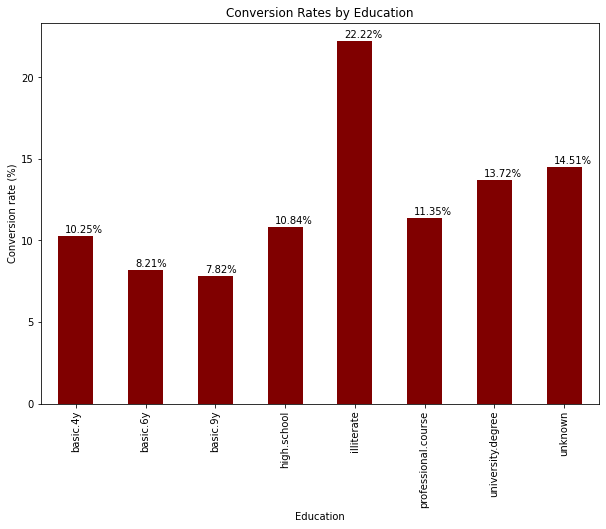

In [44]:
ax = edu_conv.plot(kind='bar',color='maroon',figsize=(10, 7),title='Conversion Rates by Education')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Education')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

Nhóm ‘illiterate’ có tỉ lệ chuyển đổi cao nhất, chiếm 22.22% tuy nhiên số lượng khách hàng thuộc nhóm này quá thấp nên không thể đánh giá chính xác được. Các nhóm trình độ còn lại có tỉ lệ chuyển đổi xấp xỉ nhau, không vượt quá 15% và chênh nhau không quá 7%.

=> Trình độ học vấn của khách hàng không có ảnh hưởng nhiều đến conversion rate.


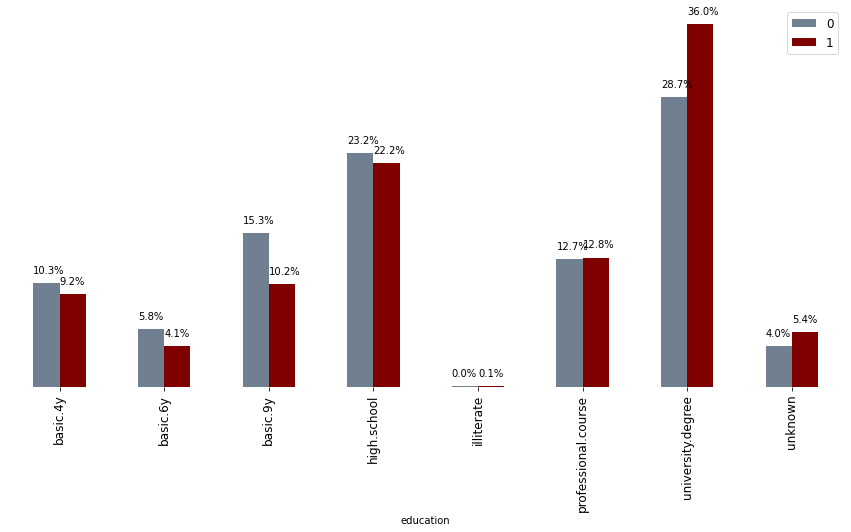

In [45]:
get_visualization('education','y')

##Is the conversion rate higher in the group having loans, housing and default?

###Loan

In [46]:
bank['loan'].value_counts()

no         33938
yes         6248
unknown      990
Name: loan, dtype: int64

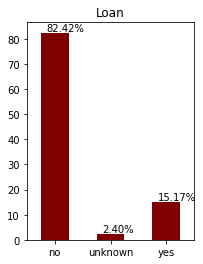

In [47]:
plt.figure(figsize=(3,4))
ax = (bank['loan'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Loan')
plt.show()

In [48]:
loan_conv = bank.groupby(by='loan')['conversion'].sum() / bank.groupby(by='loan')['conversion'].count() * 100.0
loan_conv

loan
no         11.341269
unknown    10.808081
yes        10.931498
Name: conversion, dtype: float64

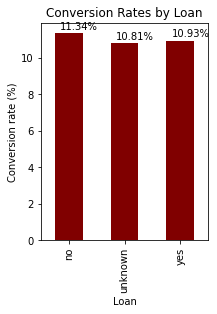

In [49]:
ax = loan_conv.plot(kind='bar',color='maroon',figsize=(3, 4),title='Conversion Rates by Loan')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Loan')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

###Housing

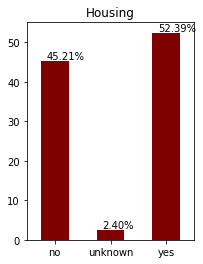

In [50]:
plt.figure(figsize=(3,4))
ax = (bank['housing'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Housing')
plt.show()

In [51]:
hou_conv = bank.groupby(by='housing')['conversion'].sum() / bank.groupby(by='housing')['conversion'].count() * 100.0
hou_conv

housing
no         10.878324
unknown    10.808081
yes        11.622085
Name: conversion, dtype: float64

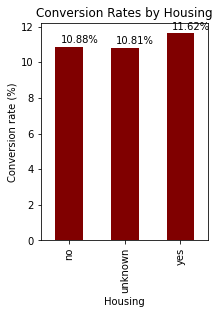

In [52]:
ax = hou_conv.plot(kind='bar',color='maroon',figsize=(3, 4),title='Conversion Rates by Housing')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Housing')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

###Default

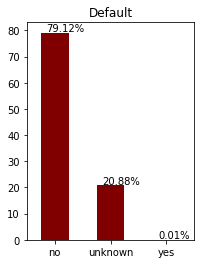

In [53]:
plt.figure(figsize=(3,4))
ax = (bank['default'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('Default')
plt.show()

In [54]:
df_conv = bank.groupby(by='default')['conversion'].sum() / bank.groupby(by='default')['conversion'].count() * 100.0
df_conv

default
no         12.880253
unknown     5.153560
yes         0.000000
Name: conversion, dtype: float64

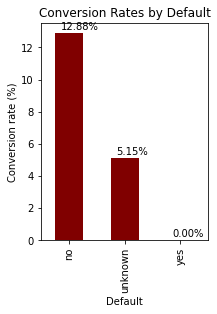

In [55]:
ax = df_conv.plot(kind='bar',color='maroon',figsize=(3, 4),title='Conversion Rates by Default')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Default')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

##Which month we should contact our customer?

In [56]:
bank.groupby(by='month')['conversion'].sum()

month
3     276
4     539
5     886
6     559
7     648
8     655
9     256
10    315
11    416
12     89
Name: conversion, dtype: int64

In [57]:
bank['month'].value_counts()

5     13767
7      7169
8      6176
6      5318
11     4100
4      2631
10      717
9       570
3       546
12      182
Name: month, dtype: int64

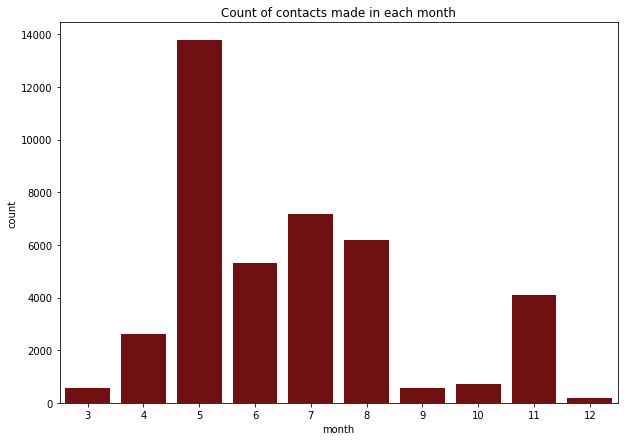

In [58]:
plt.figure(figsize = (10,7))
sns.countplot(data=bank, x='month', color='Maroon')
plt.title('Count of contacts made in each month')
plt.show()

Số lượng liên hệ của tháng liên hệ cuối cùng trong năm:
- max: tháng 5
- min: tháng 12

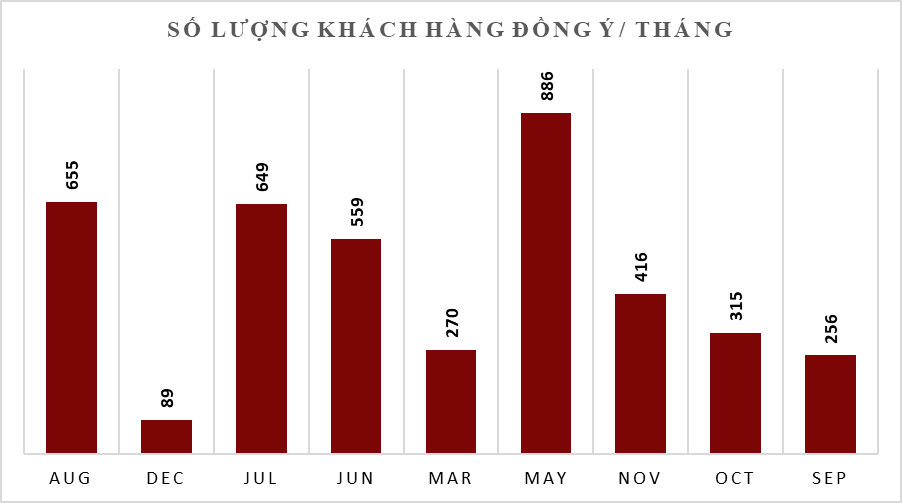

Vì tháng 5 là tháng có số lượng cuộc gọi tới khách hàng nhiều nhất, nên số lượng khách hàng đồng ý/ tháng của tháng 5 cũng đạt nhiều nhất với 886 khách hàng đồng ý mở tài khoản tiền gửi có kì hạn

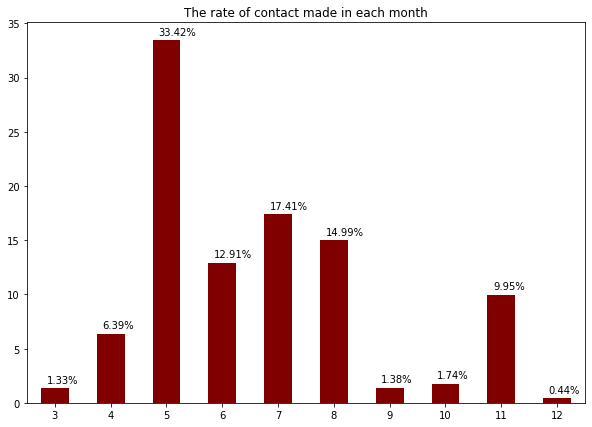

In [59]:
plt.figure(figsize=(10,7))
ax = (bank['month'].value_counts()/len(df)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('The rate of contact made in each month')
plt.show()

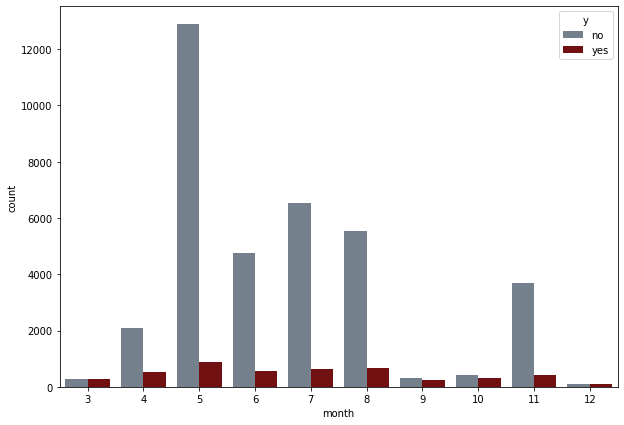

In [60]:
color = ['slategrey','maroon']
plt.figure(figsize=(10, 7))
sns.countplot(data=bank, x='month', hue='y', palette=color)
plt.show()

In [61]:
month_conv = bank.groupby(by='month')['conversion'].sum() / bank.groupby(by='month')['conversion'].count() * 100.0
month_conv

month
3     50.549451
4     20.486507
5      6.435680
6     10.511470
7      9.038918
8     10.605570
9     44.912281
10    43.933054
11    10.146341
12    48.901099
Name: conversion, dtype: float64

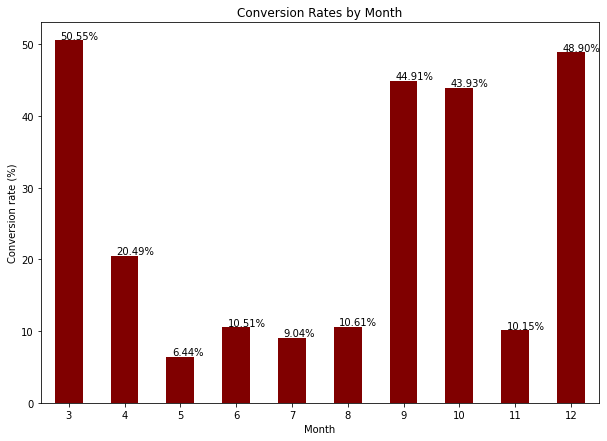

In [62]:
ax = month_conv.plot(kind='bar',color='maroon',figsize=(10, 7),rot=0,title='Conversion Rates by Month')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Month')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

Tháng 5 là tháng có số lượng khách hàng đồng ý mở tài khoản tiết kiệm cao nhất nhưng tỉ lệ chuyển đổi lại thấp nhất, chỉ có 6.44%. Tháng 12, tháng 3, tháng 9 và tháng 10 có tỉ lệ chuyển đổi rất cao với giá trị lần lượt là 50.55%,  48.9%, 44.91% và 43.93% trong khi số lượng liên hệ của các tháng này thấp nhất.


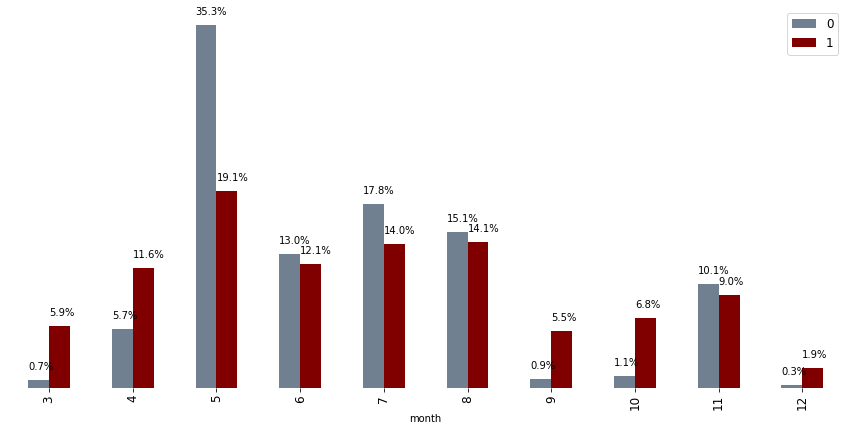

In [63]:
get_visualization('month','y')

Tháng 4 có tỉ lệ chuyển đổi là 20.49% nhưng phần trăm khách hàng đăng kí tài khoản của tháng 4/ tổng số khách hàng đăng kí nhìn chung cao hơn % khách hàng không đồng ý.

**Action:** Các chiến dịch tiếp thị tiếp theo nên tập trung hoạt động, liên hệ với khách hàng vào khoảng thời gian này.

##Which day we should contact our customer?

In [64]:
bank['day_of_week'].value_counts()

5    8618
2    8512
4    8134
3    8086
6    7826
Name: day_of_week, dtype: int64

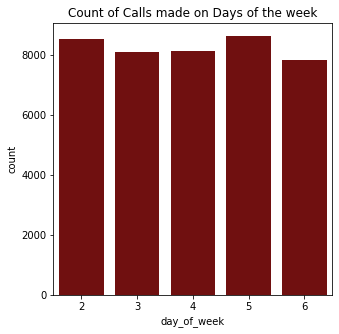

In [65]:
plt.figure(figsize = (5,5))
sns.countplot(data=bank, x='day_of_week', color='Maroon')
plt.title('Count of Calls made on Days of the week')
plt.show()

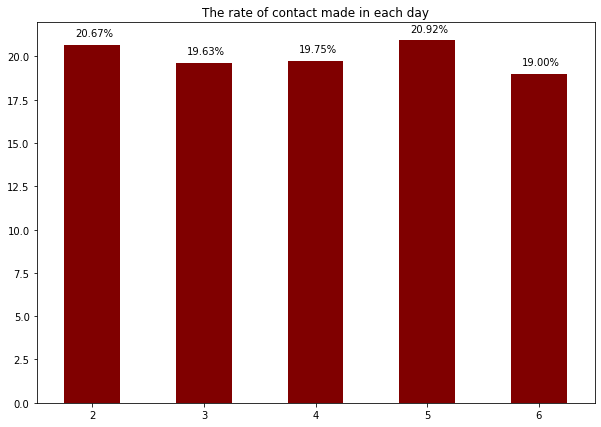

In [66]:
plt.figure(figsize=(10,7))
ax = (bank['day_of_week'].value_counts()/len(df)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.5))
plt.title('The rate of contact made in each day')
plt.show()

Số lượng liên hệ ngày liên hệ cuối cùng trong tuần tương đối tương đồng.

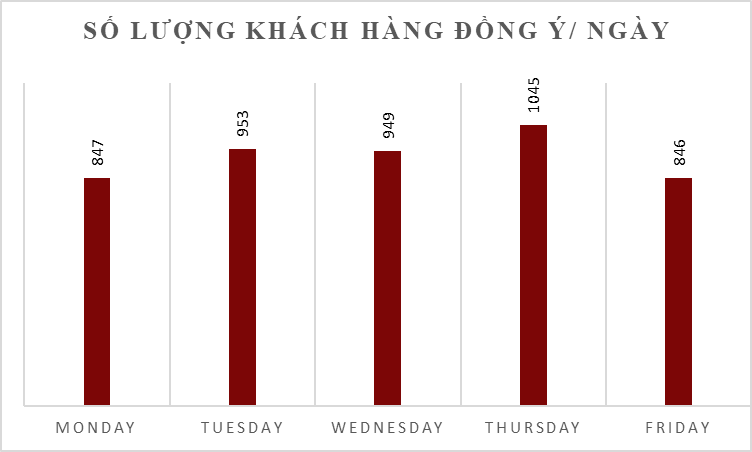

Thứ 5 là ngày có số lượng khách hàng chấp nhận mở tài khoản nhiều nhất - 1045 khách hàng. Tuy nhiên, các ngày còn lại cũng có số lượng khách hàng đồng ý rất cao, khá đồng đều và thứ 6 là ngày có ít khách hàng đồng ý nhất với 846 người. 


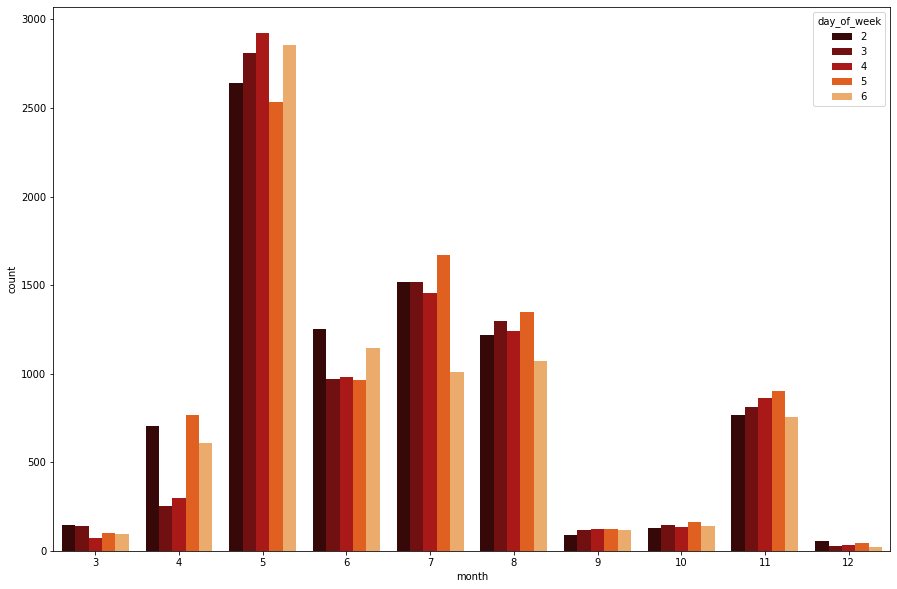

In [67]:
plt.figure(figsize=(15, 10))
sns.countplot(data=bank, x='month', hue='day_of_week', palette='gist_heat')
plt.show()

Nhìn biểu đồ có thể thấy vào các tháng, ngày nào sẽ có số lượng liên hệ cuối cùng cao nhất.

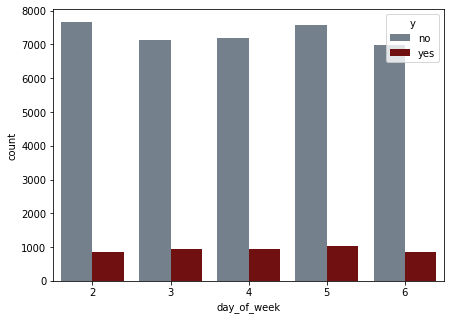

In [68]:
plt.figure(figsize=(7, 5))
sns.countplot(data=bank, x='day_of_week', hue='y', palette=color)
plt.show()

In [69]:
day_conv = bank.groupby(by='day_of_week')['conversion'].sum() / bank.groupby(by='day_of_week')['conversion'].count() * 100.0
day_conv

day_of_week
2     9.950658
3    11.785803
4    11.667076
5    12.114180
6    10.810120
Name: conversion, dtype: float64

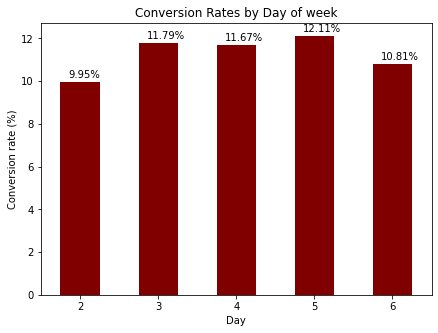

In [70]:
ax = day_conv.plot(kind='bar',color='maroon',figsize=(7, 5),rot=0,title='Conversion Rates by Day of week')
ax.set_ylabel('Conversion rate (%)')
ax.set_xlabel('Day')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.1, p.get_height()+0.2))
plt.show()

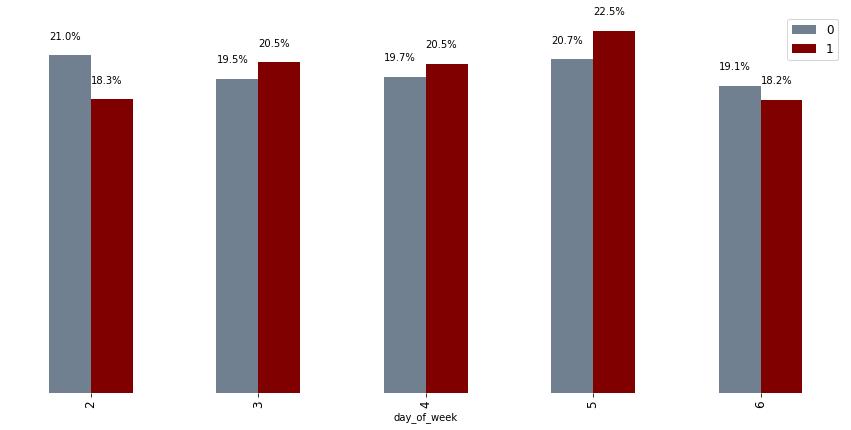

In [71]:
get_visualization('day_of_week','y')

Tỉ lệ chuyển đổi theo các ngày trong tuần cũng tương đối đồng đều, cao nhất là thứ 5 với 12.11% và thấp nhất là thứ 2 với 9.95%. Khách hàng có xu hướng đăng ký tiền gửi có kỳ hạn nhiều hơn là từ chối vào thứ 3, thứ 4 và thứ 5. Tuy nhiên không có sự khác biệt đáng kể về số lượng khách hàng tiếp cận và số lượng người đăng ký nên có vẻ như không có ngày nào tốt hơn để liên hệ với những người đăng ký tiềm năng.


##What type of contacts we should contact with our customer?

In [72]:
bank['contact'].value_counts()

cellular     26135
telephone    15041
Name: contact, dtype: int64

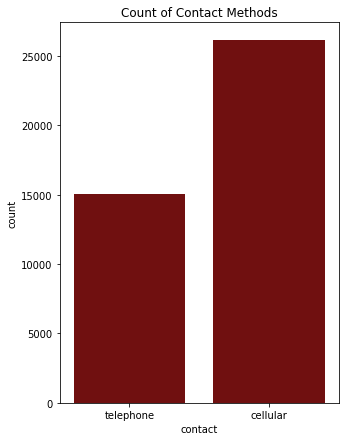

In [73]:
plt.figure(figsize = (5,7))
ax = sns.countplot(data=bank, x= 'contact', color='Maroon')
plt.title('Count of Contact Methods')
plt.show()

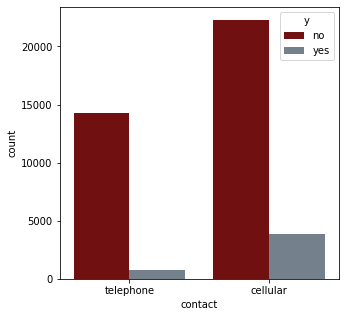

In [74]:
color = ['maroon','slategrey']
plt.figure(figsize=(5, 5))
sns.countplot(data=bank, x='contact', hue='y', palette=color)
plt.show()

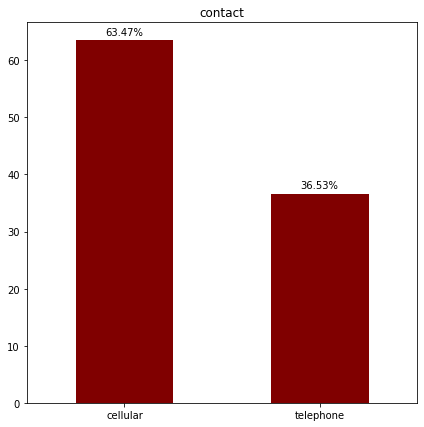

In [75]:
plt.figure(figsize=(7,7))
ax = (bank['contact'].value_counts()/len(bank)*100).sort_index().plot(kind='bar', rot=0, color = 'maroon')
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('contact')
plt.show()

In [76]:
conversion_rate_contact = bank.groupby(by='contact')['conversion'].sum() / bank.groupby(by='contact')['conversion'].count() * 100.0
conversion_rate_contact

contact
cellular     14.738856
telephone     5.232365
Name: conversion, dtype: float64

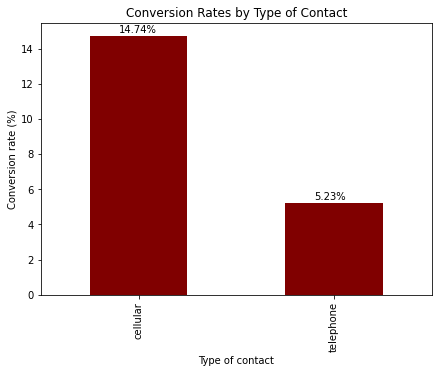

In [77]:
fig, ax = plt.subplots(figsize=(7,5))
ax = conversion_rate_contact.plot(kind='bar',color='maroon' )
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+0.2))
ax.set_title('Conversion Rates by Type of Contact')
ax.set_xlabel('Type of contact')
ax.set_ylabel('Conversion rate (%)')
plt.show()

 Hình thức liên lạc qua ‘cellular’ chiếm 63.47% và có tỉ lệ chuyển đổi cao gấp gần 3 lần so với ‘telephone’. 

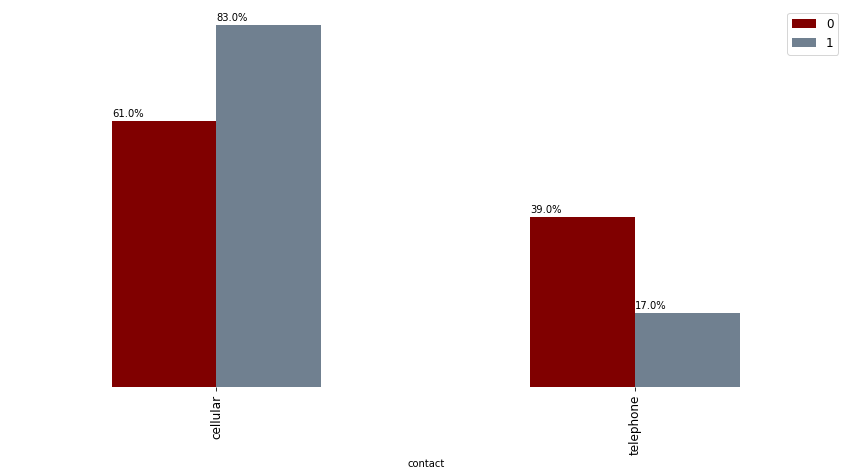

In [78]:
get_visualization('contact','y')

Khách hàng liên hệ qua ‘cellular’ đồng ý cũng nhiều hơn so với khách hàng qua ‘telephone’ gấp 5 lần.

Action: nên tập trung gọi điện tiếp thị cho nhóm khách hàng sử dụng thuê bao di động.


##How many times should we contact the customer?

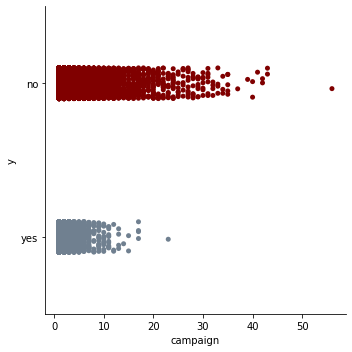

In [79]:
sns.catplot('campaign', 'y', data=bank, palette=color)
plt.show()

Khách hàng hầu như chấp nhận mở tài khoản trước lần liên hệ thứ 10. Trong các trường hợp, khách hàng đa số đăng ký ngay ở những cuộc gọi đầu tiên và trước lần thứ 6.
=> Liên lạc với một người quá 10 lần dường như không hữu ích.

**Action:** Nếu liên hệ với khách hàng tới lần thứ 10 mà họ không đồng ý đăng kí thì bỏ khách hàng đó để tiết kiệm chi phí, thời gian, nhân công.